<a href="https://colab.research.google.com/github/klara0036505959/Mini-PhotoMath/blob/master/jupyter_notebooks/char_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import itertools
import pandas as pd
import PIL
import tensorflow as tf
#from preprocess import rescale_segment as rescale_segment
#from preprocess import extract_segments as extract_segments

In [9]:
def rescale_segment( segment, size = [28,28], pad = 0 ):
   
    if len(segment.shape) == 3 : # Non Binary Image
        import cv2
        # thresholding the image
        ret,segment = cv2.threshold(segment,127,255,cv2.THRESH_BINARY)
    m,n = segment.shape
    idx1 = list(range(0,m, (m)//(size[0]) ) )
    idx2 = list(range(0,n, n//(size[1]) )) 
    out = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            out[i,j] = segment[ idx1[i] + (m%size[0])//2, idx2[j] + (n%size[0])//2]
    return out

In [10]:
def pad_along_axis(array: np.ndarray, target_length: int, axis: int = 0):

    pad_size = (target_length - array.shape[axis]) // 2
    remaining = (target_length - array.shape[axis]) % 2

    if pad_size <= 0:
        return array

    npad = [(0, 0)] * array.ndim
    npad[axis] = (pad_size , pad_size + remaining)

    return np.pad(array, pad_width=npad, mode='constant', constant_values=0)

In [11]:

def extract_segments(img, pad=30, reshape = 0,size = [28,28], area = 150, threshold = 100, 
                     gray = False, dil = True, ker = 1, squared = 1) :

    
    import cv2
    
    # thresholding the image
    ret,thresh1 = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
    
    # Negative tranform gray levels (background becomes black) 
    thresh1 = 255 - thresh1
    img = 255 - img

    # connected component labelling 
    output = cv2.connectedComponentsWithStats(thresh1, 4)
    final = []
    cords_of_segments = []
    temp2 = output[2]

    #ova linija mozda ne treba
    temp2 = temp2[temp2[:,4]>area]

    temp1 = np.sort( temp2[:,0] )
    kernel = np.ones( [ker, ker])

    for i in range(1,temp2.shape[0]):
        cord = np.squeeze( temp2[temp2[:,0] == temp1[i]] )
#         import pdb; pdb.set_trace()
#         print(cord)
    
        if gray == False:
            num = np.pad( thresh1[ cord[1]:cord[1]+cord[3], cord[0]:cord[0]+cord[2] ], pad,'constant')
        else :
            num = np.pad( img[ cord[1]:cord[1]+cord[3], cord[0]:cord[0]+cord[2] ], pad,'constant')

        if dil :
            num = cv2.dilate(num,kernel,iterations = 1)
        else :
            num = cv2.erode(num,kernel,iterations = 1)

        if reshape == 1:
            num = rescale_segment( num, size )
        if squared == 1:
            x,y = num.shape[0], num.shape[1]
            desired = max(x,y)
            axis = 0 if x < y else 1
            num = pad_along_axis(num, desired, axis)
        final.append(num/255)
        #x,y,w,h
        cords_of_segments.append((cord[0], cord[1], cord[2], cord[3]))
        
    return final, cords_of_segments

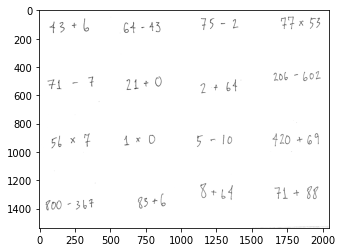

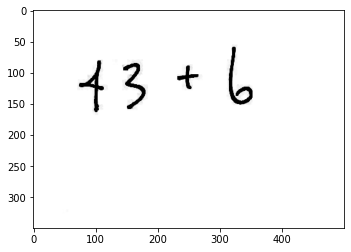

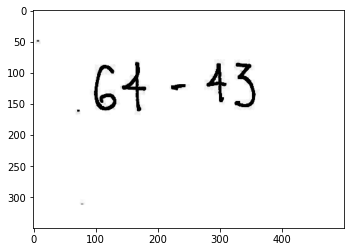

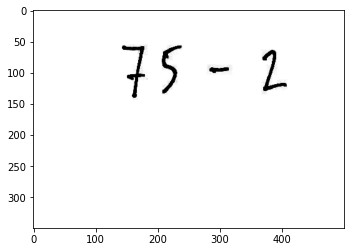

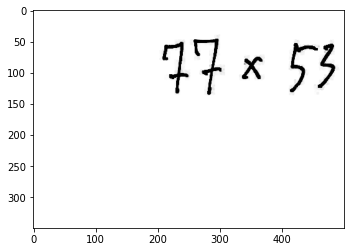

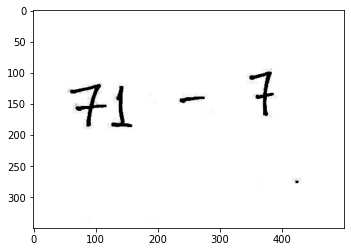

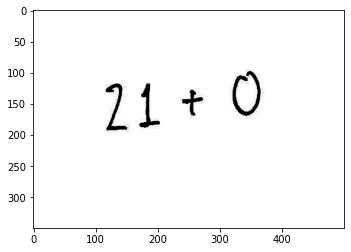

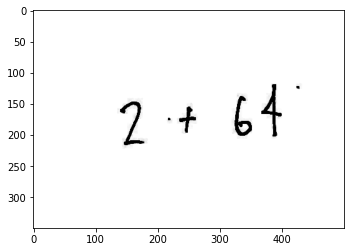

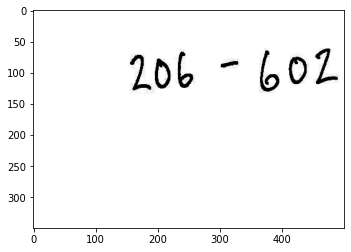

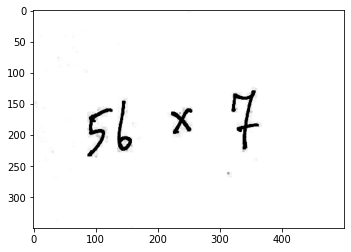

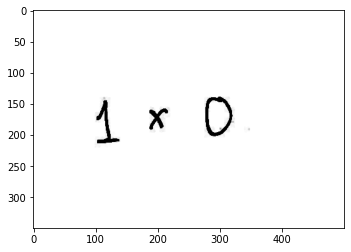

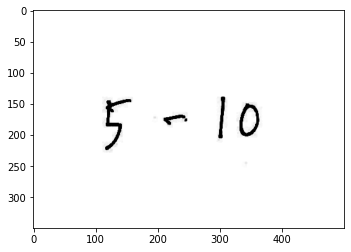

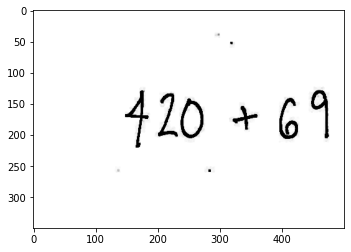

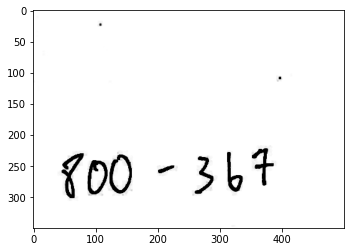

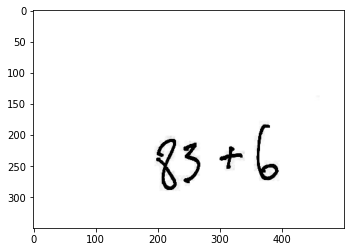

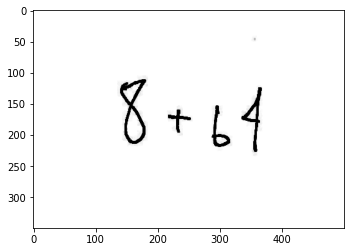

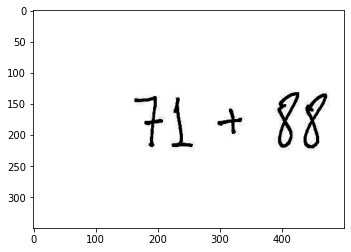

In [12]:
img = cv2.imread('/content/drive/My Drive/equations/eqn4.jpg',0)
plt.imshow(img,cmap = 'gray')
plt.show() 
image = [] ## for eqn_im_1
for i in range(4):
    for j in range(4):
        x1 = 370*i ; x2 = x1+350; y1 = 500*j ; y2 = y1 + 500
        temp = img[x1:x2,y1:y2];
        kernel = np.ones( [3,3])
        temp = cv2.erode(temp,kernel,iterations = 1)
        image.append(temp)
        plt.imshow(temp,cmap = 'gray')
        plt.show() 

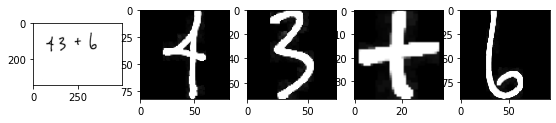

[(74, 81, 40, 83), (145, 85, 36, 74), (232, 89, 34, 38), (315, 59, 38, 93)]


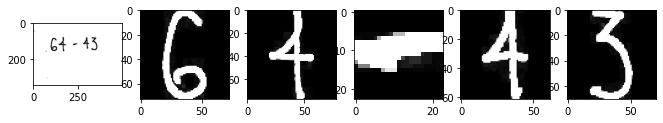

[(98, 88, 36, 73), (143, 84, 39, 78), (222, 119, 23, 10), (279, 86, 32, 62), (324, 85, 34, 71)]


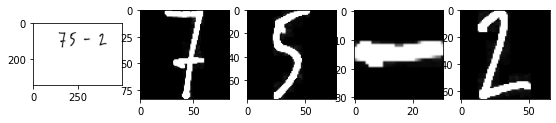

[(143, 57, 37, 84), (207, 57, 32, 77), (284, 92, 31, 9), (369, 64, 39, 66)]


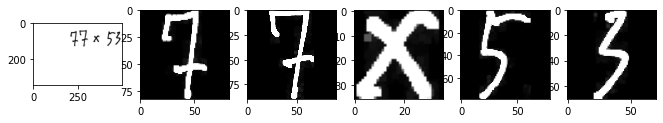

[(208, 51, 42, 83), (258, 46, 45, 90), (336, 75, 33, 36), (413, 53, 45, 79), (458, 54, 28, 71)]


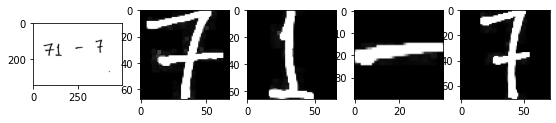

[(60, 119, 58, 68), (126, 122, 33, 66), (236, 139, 40, 10), (348, 99, 39, 71)]


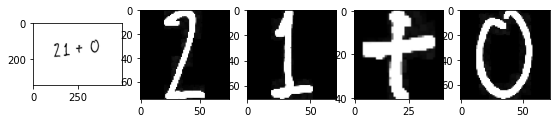

[(117, 118, 34, 75), (171, 118, 33, 71), (240, 128, 33, 41), (321, 98, 45, 72)]


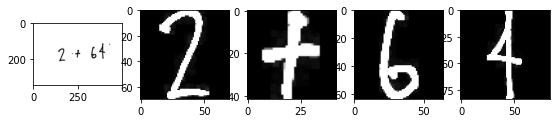

[(140, 147, 39, 70), (235, 155, 27, 42), (324, 138, 28, 64), (367, 119, 33, 84)]


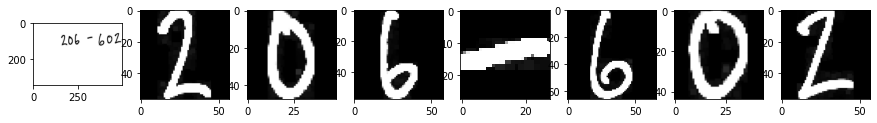

[(156, 72, 34, 57), (196, 78, 25, 48), (233, 67, 24, 58), (302, 82, 28, 10), (365, 65, 31, 66), (411, 75, 29, 44), (454, 62, 36, 57)]


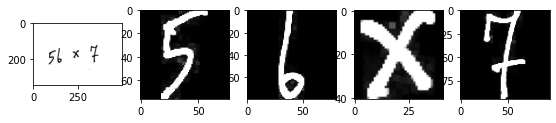

[(88, 158, 40, 77), (136, 146, 23, 80), (222, 158, 34, 41), (319, 129, 44, 95)]


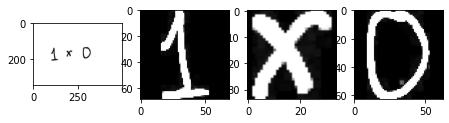

[(102, 145, 37, 69), (187, 158, 30, 34), (277, 139, 44, 63)]


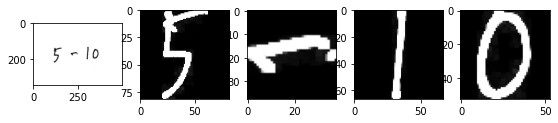

[(116, 143, 42, 82), (210, 168, 38, 16), (298, 139, 11, 67), (332, 150, 32, 53)]


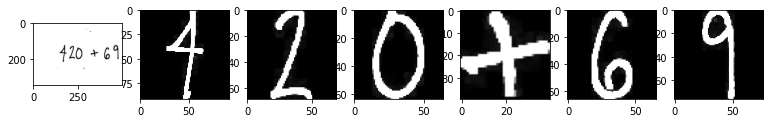

[(148, 129, 38, 92), (201, 134, 32, 69), (237, 142, 37, 64), (321, 154, 40, 38), (396, 141, 30, 66), (447, 129, 28, 77)]


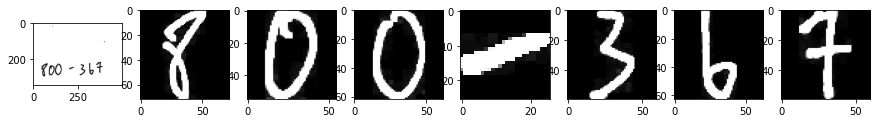

[(46, 230, 35, 72), (88, 241, 32, 55), (123, 232, 36, 62), (201, 250, 26, 12), (260, 235, 30, 60), (312, 228, 25, 63), (352, 222, 35, 60)]


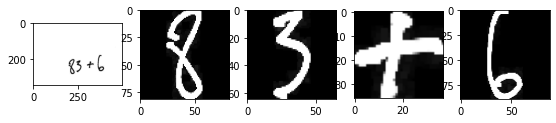

[(198, 207, 33, 82), (242, 213, 27, 65), (300, 219, 37, 36), (360, 184, 35, 89)]


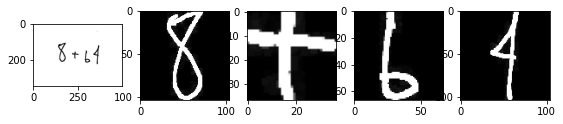

[(140, 111, 42, 104), (217, 160, 37, 37), (288, 153, 29, 67), (335, 124, 33, 104)]


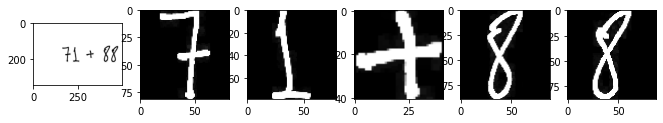

[(163, 138, 46, 82), (223, 141, 34, 79), (297, 158, 39, 41), (393, 132, 35, 89), (435, 134, 38, 88)]


In [16]:
for i in range(len(image)):
    im1 = image[i]
    segments, cords_of_segments = extract_segments(im1, pad = 0, reshape = 0, size = [28,28], 
                               threshold = 40, area = 20, ker = 1, gray = True)
    plt.figure(figsize=[15,15])
    plt.subplot(181)
    plt.imshow(im1,cmap = 'gray')
    for j in range(len(segments)):
        plt.subplot(182+j)
        plt.imshow(segments[j],cmap = 'gray')
    plt.show()
    print(cords_of_segments)
    